# Name : Kulboboev Shukhrat
# Neptun codes : JDN3HW
# Homework : Feature Selection

## 1.Importing dataset from UCI Machine Learning Repository

In [187]:
# installing the needed library to import the dataset

!pip install ucimlrepo


In [188]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

# printing metadata of dataset
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

## 2. Data processing

In [189]:
# importing needed libraries 

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

In [190]:
# output feture names from dataset
feature_names = X.columns.tolist() if hasattr(X, 'columns') else None
print("Feature Names:", feature_names)


Feature Names: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [191]:
# checking the nan  values in the dataset
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

In [192]:
# replacing nan with mean of that column in order to keep the number of sequence
X['ca'] = X['ca'].fillna(X['ca'].mean())
X['thal'] = X['thal'].fillna(X['thal'].mean())

C:\Users\HP\AppData\Local\Temp\ipykernel_23468\1977171388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ca'] = X['ca'].fillna(X['ca'].mean())
C:\Users\HP\AppData\Local\Temp\ipykernel_23468\1977171388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['thal'] = X['thal'].fillna(X['thal'].mean())


In [193]:
# checking nan values after replacement

X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [194]:
# checking the nan values in target values
y.isnull().sum()

num    0
dtype: int64

In [195]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope        ca  thal  
0        3  0.000000   6.0  
1        2  3.000000   3.0  


In [196]:
print(y)

     num
0      0
1      2
2      1
3      0
4      0
..   ...
298    1
299    2
300    3
301    1
302    0

[303 rows x 1 columns]


In [197]:
# splitting data test and train set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3. Data visualization and filter selection and correlation

Type of y: <class 'pandas.core.frame.DataFrame'>
Shape of y: (303, 1)
Flattened y to 1D: (303,)


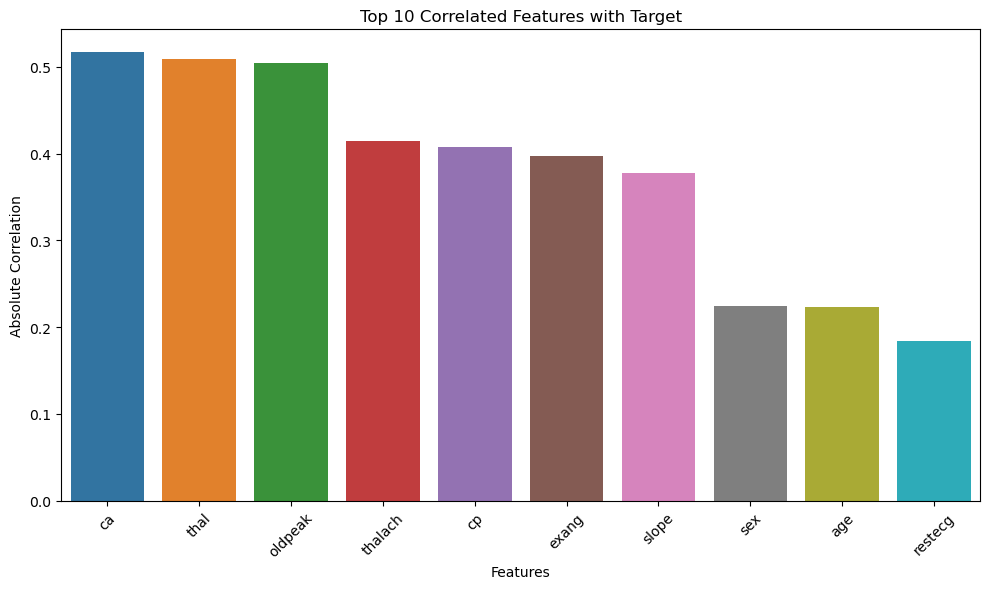

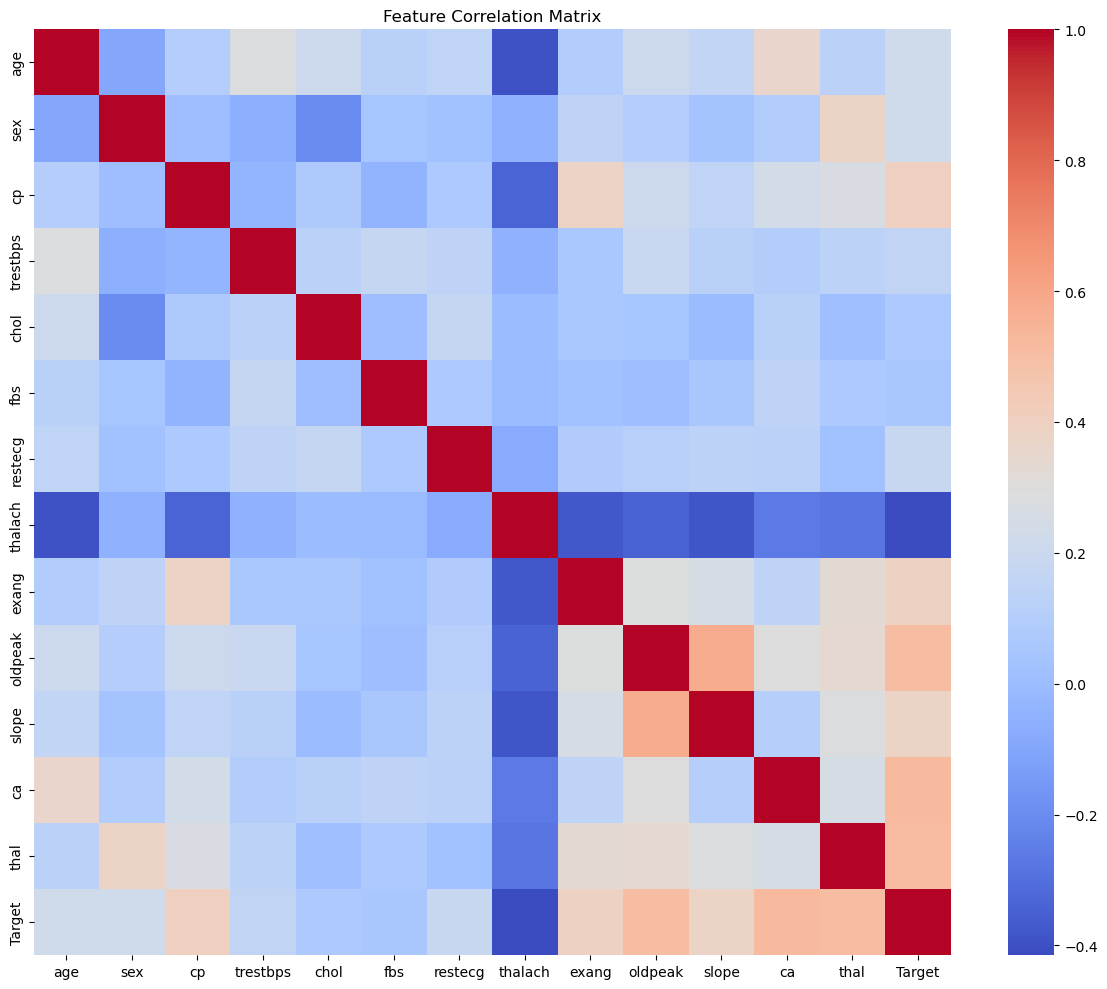

In [198]:
# import needed libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Debugging y
print("Type of y:", type(y))
print("Shape of y:", getattr(y, 'shape', 'N/A'))

# Check if y is valid
if y is None or len(y) == 0:
    raise ValueError("y is empty or not initialized correctly!")

# Ensure y is 1D
if hasattr(y, 'ndim') and y.ndim > 1:
    y = np.ravel(y)
    print("Flattened y to 1D:", y.shape)

# Convert to DataFrame and Series
X_df = pd.DataFrame(X, columns=feature_names)
y_df = pd.Series(y, name='Target')

# Ensure lengths match
assert len(X_df) == len(y_df), f"Length mismatch! X: {len(X_df)}, y: {len(y_df)}"

# Compute correlation matrix
correlation_matrix = X_df.corrwith(y_df).abs()

# Sort and visualize
sorted_correlation = correlation_matrix.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_correlation.index[:10], y=sorted_correlation.values[:10])
plt.title("Top 10 Correlated Features with Target")
plt.ylabel("Absolute Correlation")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#print("Correlation Method Selected Features:", selected_features_corr)
# Full correlation matrix
all_features_df = pd.concat([X_df, y_df], axis=1)
full_correlation_matrix = all_features_df.corr()

# Visualize as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(full_correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()


#print("Correlation Method Selected Features:", selected_features_corr)

### 3.1 WRAPPER METHOD - RECURSIVE ELIMINATION

Wrapper methods are a type of feature selection technique where subsets of features are selected and evaluated based on the performance of a predictive model

In [203]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale the data to improve model performance and convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale training data
X_test_scaled = scaler.transform(X_test)       # Scale testing data

# Logistic Regression model
wrapper_model = LogisticRegression(max_iter=1000, random_state=42)

# Recursive Feature Elimination (RFE) with Logistic Regression
rfe_selector = RFE(estimator=wrapper_model, n_features_to_select=5, step=1)

# Ensure y_train is 1D using .values.ravel()
rfe_selector = rfe_selector.fit(X_train_scaled, y_train.values.ravel())

# Transform training and testing sets based on selected features
X_train_wrapper = rfe_selector.transform(X_train_scaled)
X_test_wrapper = rfe_selector.transform(X_test_scaled)

# Get selected feature indices and names
wrapper_support = rfe_selector.get_support(indices=True)
selected_features_wrapper = [feature_names[i] for i in wrapper_support]

print("Wrapper Method Selected Features:", selected_features_wrapper)




Wrapper Method Selected Features: ['cp', 'fbs', 'oldpeak', 'ca', 'thal']


### 3.2 LASSO

Lasso (Least Absolute Shrinkage and 
Selection Operator) is a linear regression 
method that performs feature selection 
and regularization by adding a penalty to 
the absolute values of the coefficients of 
the regression model.
 The penalty term λ encourages the model 
to shrink less important coefficients to 
exactly zero, effectively removing those 
features. The larger the λ (the stronger the 
penalty), resulting in fewer features being 
selected

In [204]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the dataset (Lasso is sensitive to scale)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Lasso model with regularization
lasso_model = Lasso(alpha=0.01, random_state=42)  # Adjust alpha for regularization strength
lasso_model.fit(X_train_scaled, y_train)

# Get feature coefficients
lasso_coefficients = lasso_model.coef_

# Select features with non-zero coefficients
selected_features_lasso = [feature_names[i] for i, coef in enumerate(lasso_coefficients) if coef != 0]

print("Lasso Method Selected Features:", selected_features_lasso)

# If X_train is a pandas DataFrame, select the columns by their names
X_train_lasso = X_train[selected_features_lasso]
X_test_lasso = X_test[selected_features_lasso]


Lasso Method Selected Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


## 4.Evaluation,Accuracy and Comparison

In [212]:
from sklearn.metrics import accuracy_score, log_loss

# 1. Build Model
model = LogisticRegression(max_iter=4000, random_state=42)

# 2. & 3. Function for training and predicting
def evaluate_features(X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)  # Get predicted probabilities
    return accuracy_score(y_test, y_pred), log_loss(y_test, y_pred_proba, labels=[0, 1, 2, 3, 4])

# 4. Evaluate for each method
accuracy_wrapper, loss_wrapper = evaluate_features(X_train_wrapper, X_test_wrapper, y_train.values.ravel(), y_test.values.ravel())
accuracy_scaled_lasslo, loss_scaled = evaluate_features(X_train_lasso, X_test_lasso, y_train.values.ravel(), y_test.values.ravel())
accuracy_scaled_org,org_scaled = evaluate_features(X_train_scaled, X_test_scaled, y_train.values.ravel(), y_test.values.ravel())
# Output results
print(f"Wrapper Recursive Method - Accuracy: {accuracy_wrapper}, Log Loss: {loss_wrapper}")
print(f"Embedded Lasso Method - Accuracy: {accuracy_scaled_lasslo}, Log Loss: {loss_scaled}")
print(f"Original model - Accuracy: {accuracy_scaled_org}, Log Loss: {org_scaled}")



Wrapper Recursive Method - Accuracy: 0.5714285714285714, Log Loss: 1.0947877769093532
Embedded Lasso Method - Accuracy: 0.5714285714285714, Log Loss: 1.0643800190526136
Original model - Accuracy: 0.5384615384615384, Log Loss: 1.141395189514962


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 5.Report

### 5.1 Dataset

4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach

Dataset Characteristics
Multivariate

Subject Area
Health and Medicine

Associated Tasks
Classification

Feature Type
Categorical, Integer, Real

#### Instances
303

#### Features
13
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  
   
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database.  All four unprocessed files also exist in this directory.

### 5.2 Method used in this task

Two methods are used in this task :
    *Lasso* and 
    *Wrapper Methods*



** Lasso ** :  Lasso (Least Absolute Shrinkage and 
Selection Operator) is a linear regression 
method that performs feature selection 
and regularization by adding a penalty to 
the absolute values of the coefficients of 
the regression model.
 The penalty term λ encourages the model 
to shrink less important coefficients to 
exactly zero, effectively removing those 
features. The larger the λ (the stronger the 
penalty), resulting in fewer features being 
selected

** Wrapper method- Recursive Selection **  :  Combines backward 
elimination with feature 
ranking (RFE score).
 Iteratively removes the least 
important features and re
evaluates the model.
 Stopping Criterion: Continue 
until a desired number of 
features is reached.


### 5.3 Results and Comparison

Here , I took three methods :

Wrapper Recursive Method - Accuracy: 0.5714285714285714, Log Loss: 1.0947877769093532


Embedded Lasso Method - Accuracy: 0.5714285714285714, Log Loss: 1.0643800190526136


Original model - Accuracy: 0.5384615384615384, Log Loss: 1.141395189514962

As you can see in the result , when I used feature selection , the model accuracy is higher than compared to model that feature selection is not used